In [5]:
import pandas as pd

In [4]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [7]:
import os
for dirname, _, filenames in os.walk('/chest_xray/train/NORMAL'):
    for filename in filenames:
        print(dirname)

In [8]:
import os
for root, dirs, files in os.walk("/chest_xray", topdown=True):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

In [38]:
normal_xray=[]
for file in os.walk('./chest_xray/train/NORMAL', topdown=False): 
     normal_xray.append(file) 

In [39]:
pneumonia_xray=[]
for file in os.walk('./chest_xray/train/PNEUMONIA', topdown=False): 
     pneumonia_xray.append(file) 

In [40]:
pneumonia_xray=pneumonia_xray[0][2]

In [41]:
normal_xray=normal_xray[0][2]

In [42]:
for i in range(len(normal_xray)):
    normal_xray[i]={'catogery':'normal','path':'./chest_xray/train/NORMAL/'+normal_xray[i]}

In [43]:
for i in range(len(pneumonia_xray)):
    if(pneumonia_xray[i].find('bacteria')>0):
        pneumonia_xray[i]={'catogery':'bacteria','path':'./chest_xray/train/PNEUMONIA/'+pneumonia_xray[i]}
    else:
        pneumonia_xray[i]={'catogery':'virus','path':'./chest_xray/train/PNEUMONIA/'+pneumonia_xray[i]}

In [44]:
#combining all the xrays

In [45]:
xrays=list(normal_xray)

In [46]:
xrays.extend(pneumonia_xray)

In [47]:
#converting to datafram

In [48]:
xray_df=pd.DataFrame(xrays)

In [49]:
#maintaining temporary variable which can be useful in case mistakes happen

In [50]:
xray_df_temp=pd.DataFrame(xray_df)

In [51]:
#getting images from path

In [52]:
images=[]
for xray in list(xray_df['path']):
    images.append({'image':plt.imread(xray)})
    

In [53]:
images

[{'image': array([[ 22,  24,  24, ...,  96,  94,  93],
         [ 23,  24,  24, ...,  97,  94,  92],
         [ 24,  24,  23, ...,  99,  96,  94],
         ...,
         [ 49,  50,  48, ..., 119, 119, 119],
         [ 50,  52,  53, ..., 123, 124, 123],
         [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)},
 {'image': array([[11, 11, 15, ..., 17, 16, 15],
         [ 9, 10, 14, ..., 17, 15, 13],
         [ 8, 10, 14, ..., 18, 16, 15],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)},
 {'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 2, 0, 0],
         [0, 0, 0, ..., 3, 2, 2],
         [0, 0, 0, ..., 3, 3, 3]], dtype=uint8)},
 {'image': array([[36, 38, 40, ..., 21, 20, 20],
         [36, 38, 40, ..., 21, 21, 21],
         [37, 38, 39, ..., 22, 21, 20],
         ...,
         [13, 14, 15

In [ ]:
#appending the image data to datafram

In [54]:
xray_df['image']=pd.DataFrame(images)['image']

In [58]:
#temporary df

In [59]:
xray_df_temp=pd.DataFrame(xray_df)

In [60]:
temporary=xray_df[:1000]

In [152]:
xray_df=xray_df_temp.copy(deep=True)

In [64]:
xray_df[xray_df['catogery']=='virus'][:3]

,catogery,path,image
1342,virus,./chest_xray/train/PNEUMONIA/person1000_virus_...,"[[66, 64, 62, 61, 61, 60, 58, 55, 61, 65, 72, ..."
1346,virus,./chest_xray/train/PNEUMONIA/person1003_virus_...,"[[124, 128, 132, 136, 137, 138, 140, 142, 145,..."
1348,virus,./chest_xray/train/PNEUMONIA/person1004_virus_...,"[[19, 21, 24, 25, 25, 21, 17, 15, 22, 255, 255..."


In [66]:
xray_df[xray_df['catogery']=='normal'][:3]

,catogery,path,image
0,normal,./chest_xray/train/NORMAL/IM-0115-0001.jpeg,"[[22, 24, 24, 23, 22, 23, 23, 23, 20, 20, 20, ..."
1,normal,./chest_xray/train/NORMAL/IM-0117-0001.jpeg,"[[11, 11, 15, 15, 15, 18, 19, 24, 26, 24, 23, ..."
2,normal,./chest_xray/train/NORMAL/IM-0119-0001.jpeg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [65]:
xray_df[xray_df['catogery']=='bacteria'][:3]

,catogery,path,image
1341,bacteria,./chest_xray/train/PNEUMONIA/person1000_bacter...,"[[19, 19, 18, 18, 18, 19, 20, 20, 21, 24, 28, ..."
1343,bacteria,./chest_xray/train/PNEUMONIA/person1001_bacter...,"[[14, 14, 14, 14, 15, 16, 18, 18, 23, 22, 23, ..."
1344,bacteria,./chest_xray/train/PNEUMONIA/person1002_bacter...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
#normal xray

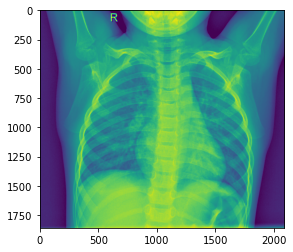

In [67]:
plt.imshow(xray_df.iloc[0]['image'])

In [ ]:
#bacteria pneumonia

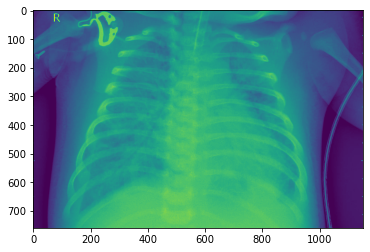

In [69]:
plt.imshow(xray_df.iloc[1341]['image'])

In [70]:
#viral pneumonia

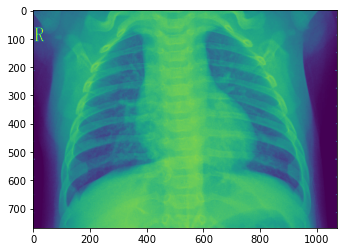

In [71]:
plt.imshow(xray_df.iloc[1342]['image'])

In [84]:
enumerate(xray_df['image'].iteritems())

In [ ]:
#find the maximum number of rows and maximum no of columns in image

In [155]:
xray_df.iloc[0]['image'].shape

(1858, 2090)

In [162]:
max_pixels=0
max_row=0
max_column=0
max_shape=1
for (key,value) in enumerate(xray_df['image'].iteritems()):
    row=value[1].shape[0]
    column=value[1].shape[1]
    pixels=row*column
    if(pixels>max_pixels):
        max_pixels=pixels
        max_shape=value[1].shape
    if(row>max_row):
        max_row=row
    if(column>max_column):
        max_column=column
    


In [158]:
max_pixels,max_row,max_column

(7532028, 2663, 2916)

In [163]:
max_shape

(2583, 2916)